# Pricing Arithmetic Asian Options with Control Variate

In [1]:
import fineng_irfx as fe
import matplotlib.pyplot as plt
import numpy as np
import math
from asian import *

In [2]:
plot_dir = r"plots/Asian/"

In [3]:
BM = fe.L4_BoxMuller(1)

### Convergence Analysis

In [4]:
S0 = 1.0
r = 0.05
sigma = 0.15

T = 5.0
K = 1.2

m = 100

# Arith
arith_call = price_asian(S0, sigma, r, T, K, True, True, m, BM)
arith_put = price_asian(S0, sigma, r, T, K, False, True, m, BM)

# Geom
geom_call = price_asian(S0, sigma, r, T, K, True, False, m, BM)
geom_put = price_asian(S0, sigma, r, T, K, False, False, m, BM)

In [5]:
# running analytics
path_list = [int(10**i) for i in np.linspace(2, 5, 150)]

In [6]:
# pricing by MC

arith_call_prices, arith_call_errors = [], []
arith_put_prices, arith_put_errors = [], []

arith_call_cv_prices, arith_call_cv_errors = [], []
arith_put_cv_prices, arith_put_cv_errors = [], []

geom_call_prices, geom_call_errors = [], []
geom_put_prices, geom_put_errors = [], []

geom_call_analytical = []
geom_put_analytical = []

In [7]:
for n in path_list:
    # arith call
    price_mc, error_mc = arith_call.price_S0(S0, n, True)
    arith_call_prices.append(price_mc)
    arith_call_errors.append(error_mc)
    price_mc, error_mc = arith_call.price_CV(n, True)
    arith_call_cv_prices.append(price_mc)
    arith_call_cv_errors.append(error_mc)

    # arith put
    price_mc, error_mc = arith_put.price_S0(S0, n, True)
    arith_put_prices.append(price_mc)
    arith_put_errors.append(error_mc)
    price_mc, error_mc = arith_put.price_CV(n, True)
    arith_put_cv_prices.append(price_mc)
    arith_put_cv_errors.append(error_mc)

In [8]:
for n in path_list:
    # geom call
    price_mc, error_mc = geom_call.price_S0(S0, n, True)
    geom_call_prices.append(price_mc)
    geom_call_errors.append(error_mc)
    geom_call_analytical.append(geom_call.price_S0(S0, None, False))

    # geom put
    price_mc, error_mc = geom_put.price_S0(S0, n, True)
    geom_put_prices.append(price_mc)
    geom_put_errors.append(error_mc)
    geom_put_analytical.append(geom_put.price_S0(S0, None, False))

In [9]:
n_log = np.log10(np.array(path_list))

# arith
arith_call_errors_log = np.log10(np.array(arith_call_errors))
arith_put_errors_log = np.log10(np.array(arith_put_errors))
arith_call_cv_errors_log = np.log10(np.array(arith_call_cv_errors))
arith_put_cv_errors_log = np.log10(np.array(arith_put_cv_errors))

# geom
geom_call_errors_log = np.log10(np.array(geom_call_errors))
geom_put_errors_log = np.log10(np.array(geom_put_errors))

### Plotting

In [10]:
def plot_scaling_analysis(
    x_axis,
    data1,
    data2,
    data3=None,
    data4=None,
    y_label=None,
    title=None,
    save_path=None,
    logx=False,
):
    plt.figure()
    plt.title(title)
    if logx:
        plt.xscale("log")
    plt.plot(x_axis[0], data1[0], label=data1[1], alpha=0.7, linewidth=1.0)
    if data2:
        plt.plot(x_axis[0], data2[0], label=data2[1], alpha=0.7, linewidth=1.0)
    if data3:
        plt.plot(x_axis[0], data3[0], label=data3[1], alpha=0.7, linewidth=1.0)
    if data4:
        plt.plot(x_axis[0], data4[0], label=data4[1], alpha=0.7, linewidth=1.0)
    plt.legend()
    plt.grid(color="grey", linewidth=0.35, linestyle="--", alpha=0.35)
    plt.xlabel(x_axis[1])
    plt.ylabel(y_label)
    if save_path:
        plt.savefig(save_path)
    plt.show()

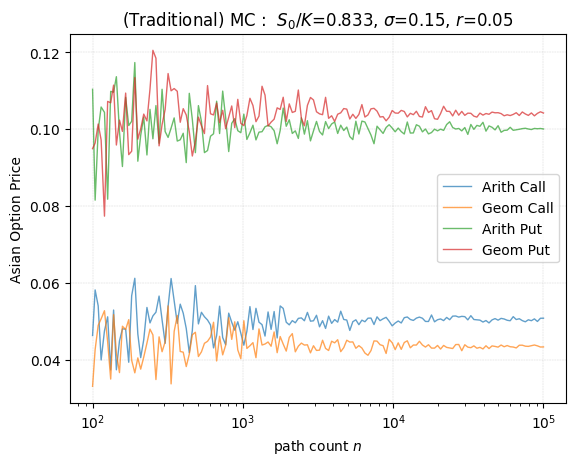

In [11]:
x_axis = [path_list, r"path count $n$"]
data1 = [arith_call_prices, "Arith Call"]
data2 = [geom_call_prices, "Geom Call"]
data3 = [arith_put_prices, "Arith Put"]
data4 = [geom_put_prices, "Geom Put"]
y_label = "Asian Option Price"
title = rf"(Traditional) MC :  $S_0/K$={S0/K:.3f}, $\sigma$={sigma:.2f}, $r$={r:.2f}"

save_path = plot_dir + "Asian_price_scaling.png"
# save_path = None

plot_scaling_analysis(
    x_axis, data1, data2, data3, data4, y_label, title, save_path, True
)

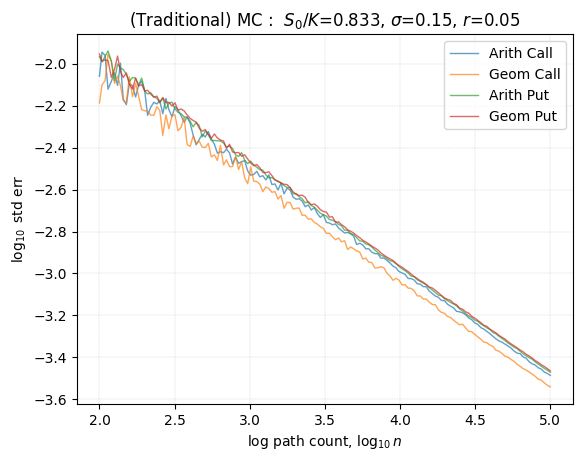

In [12]:
x_axis = [n_log, r"log path count, $\log_{10} n$"]
data1 = [arith_call_errors_log, "Arith Call"]
data2 = [geom_call_errors_log, "Geom Call"]
data3 = [arith_put_errors_log, "Arith Put"]
data4 = [geom_put_errors_log, "Geom Put"]
y_label = "$\log_{10}$ std err"
title = rf"(Traditional) MC :  $S_0/K$={S0/K:.3f}, $\sigma$={sigma:.2f}, $r$={r:.2f}"

save_path = plot_dir + "Asian_log_error_scaling.png"
# save_path = None

plot_scaling_analysis(x_axis, data1, data2, data3, data4, y_label, title, save_path)

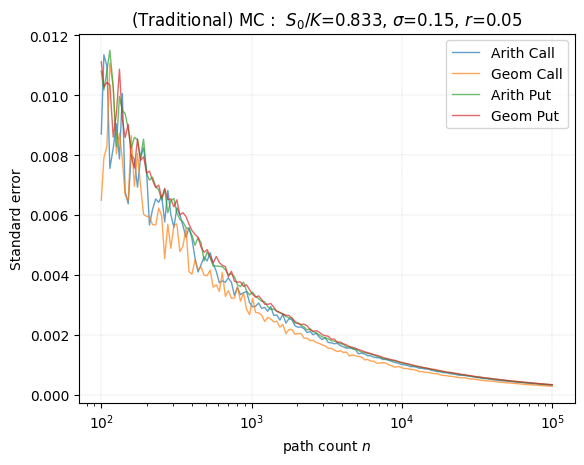

In [13]:
x_axis = [path_list, r"path count $n$"]
data1 = [arith_call_errors, "Arith Call"]
data2 = [geom_call_errors, "Geom Call"]
data3 = [arith_put_errors, "Arith Put"]
data4 = [geom_put_errors, "Geom Put"]
y_label = "Standard error"
title = rf"(Traditional) MC :  $S_0/K$={S0/K:.3f}, $\sigma$={sigma:.2f}, $r$={r:.2f}"

save_path = plot_dir + "Asian_error_scaling.png"
# save_path = None

plot_scaling_analysis(
    x_axis, data1, data2, data3, data4, y_label, title, save_path, True
)

### Pricing arithmetic Asian with geometric Asian as control variate

In [14]:
def plot_cv_analysis(
    x_axis,
    data1,
    data2,
    err1=None,
    err2=None,
    y_label=None,
    title=None,
    save_path=None,
    logx=False,
):
    plt.figure()
    plt.title(title)
    if logx:
        plt.xscale("log")
    plt.plot(x_axis[0], data1[0], label=data1[1], alpha=0.75, linewidth=1.2)
    if data2:
        plt.plot(x_axis[0], data2[0], label=data2[1], alpha=0.75, linewidth=1.2)
    if err1:
        upper1 = [data1[0][-1] + 2 * e for e in err1[0]]
        lower1 = [data1[0][-1] - 2 * e for e in err1[0]]
        plt.fill_between(
            x_axis[0], upper1, lower1, label=err1[1] + r" $\pm 2$ std.err", alpha=0.3
        )
    if err2 and data2:
        upper2 = [data2[0][-1] + 2 * e for e in err2[0]]
        lower2 = [data2[0][-1] - 2 * e for e in err2[0]]
        plt.fill_between(
            x_axis[0], upper2, lower2, label=err2[1] + r" $\pm 2$ std.err", alpha=0.3
        )
    plt.legend()
    plt.grid(color="grey", linewidth=0.35, linestyle="--", alpha=0.35)
    plt.xlabel(x_axis[1])
    plt.ylabel(y_label)
    if save_path:
        plt.savefig(save_path)
    plt.show()

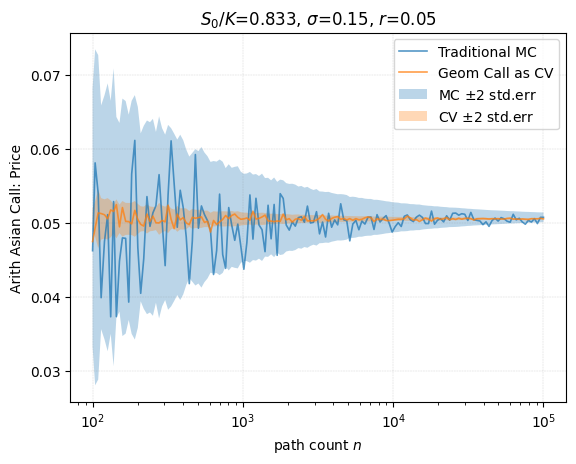

In [15]:
x_axis = [path_list, r"path count $n$"]
data1 = [arith_call_prices, "Traditional MC"]
data2 = [arith_call_cv_prices, "Geom Call as CV"]
err1 = [arith_call_errors, "MC"]
err2 = [arith_call_cv_errors, "CV"]
y_label = "Arith Asian Call: Price"
title = rf"$S_0/K$={S0/K:.3f}, $\sigma$={sigma:.2f}, $r$={r:.2f}"

arith_put_cv_prices.append(price_mc)
arith_put_cv_errors.append(error_mc)

save_path = plot_dir + "ArithAsian_price_scaling.png"
# save_path = None

plot_cv_analysis(x_axis, data1, data2, err1, err2, y_label, title, save_path, True)

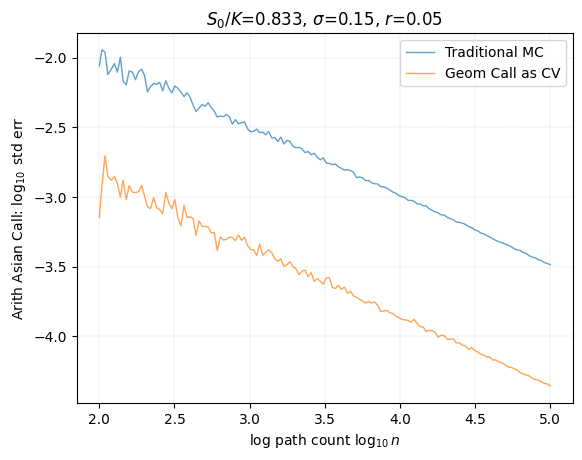

In [16]:
x_axis = [n_log, r"log path count $\log_{10} n$"]
data1 = [arith_call_errors_log, "Traditional MC"]
data2 = [arith_call_cv_errors_log, "Geom Call as CV"]
data3 = None
data4 = None
y_label = r"Arith Asian Call: $\log_{10}$ std err"
title = rf"$S_0/K$={S0/K:.3f}, $\sigma$={sigma:.2f}, $r$={r:.2f}"

save_path = plot_dir + "Asian_log_error_scaling.png"
# save_path = None

plot_scaling_analysis(x_axis, data1, data2, data3, data4, y_label, title, save_path)

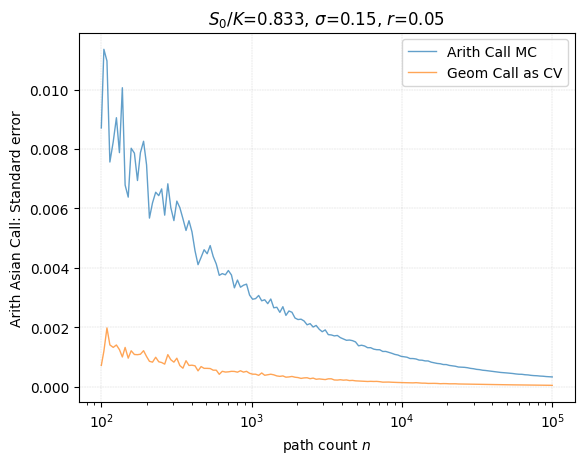

In [17]:
x_axis = [path_list, r"path count $n$"]
data1 = [arith_call_errors, "Arith Call MC"]
data2 = [arith_call_cv_errors, "Geom Call as CV"]
data3 = None
data4 = None
y_label = "Arith Asian Call: Standard error"
title = rf"$S_0/K$={S0/K:.3f}, $\sigma$={sigma:.2f}, $r$={r:.2f}"

save_path = plot_dir + "Asian_error_scaling.png"
# save_path = None

plot_scaling_analysis(
    x_axis, data1, data2, data3, data4, y_label, title, save_path, True
)

### Correlation Analysis - need to be able to contol seeds

### Asian Option as function of sigma

In [18]:
S0 = 1.0
r = 0.05
sigma = 0.15

T = 5.0
K = 1.2

m = 100

# Arith
arith_call = price_asian(S0, sigma, r, T, K, True, True, m, BM)
arith_put = price_asian(S0, sigma, r, T, K, False, True, m, BM)

# Geom
geom_call = price_asian(S0, sigma, r, T, K, True, False, m, BM)
geom_put = price_asian(S0, sigma, r, T, K, False, False, m, BM)

In [19]:
vols = np.linspace(0.001, 0.8, 200)
Npath = 10000

arith_call_prices_vol = [
    arith_call.price_accurate(S0, r, vol, K, T, Npath, False) for vol in vols
]
arith_put_prices_vol = [
    arith_put.price_accurate(S0, r, vol, K, T, Npath, False) for vol in vols
]

geom_call_prices_vol = [
    geom_call.price_accurate(S0, r, vol, K, T, Npath, False) for vol in vols
]
geom_put_prices_vol = [
    geom_put.price_accurate(S0, r, vol, K, T, Npath, False) for vol in vols
]

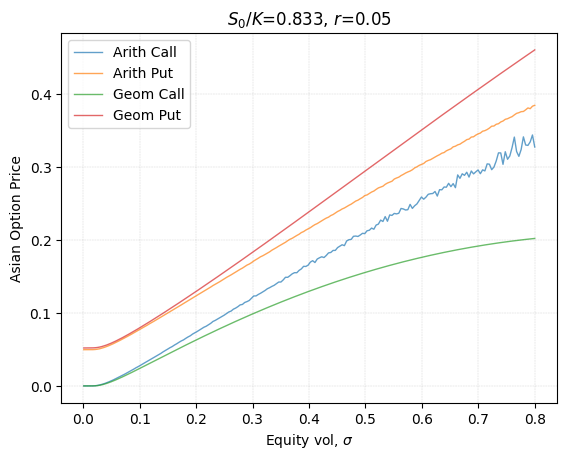

In [20]:
x_axis = [vols, r"Equity vol, $\sigma$"]
data1 = [arith_call_prices_vol, "Arith Call"]
data2 = [arith_put_prices_vol, "Arith Put"]
data3 = [geom_call_prices_vol, "Geom Call"]
data4 = [geom_put_prices_vol, "Geom Put"]
y_label = "Asian Option Price"
title = rf"$S_0/K$={S0/K:.3f}, $r$={r:.2f}"

save_path = plot_dir + "Asian_opt_price_volatility.png"
# save_path = None

plot_scaling_analysis(
    x_axis, data1, data2, data3, data4, y_label, title, save_path, False
)

In [21]:
Ts = np.linspace(0.001, 30, 200)
Npath = 10000

arith_call_prices_T = [
    arith_call.price_accurate(S0, r, sigma, K, tau, Npath, False) for tau in Ts
]
arith_put_prices_T = [
    arith_put.price_accurate(S0, r, sigma, K, tau, Npath, False) for tau in Ts
]

geom_call_prices_T = [
    geom_call.price_accurate(S0, r, sigma, K, tau, Npath, False) for tau in Ts
]
geom_put_prices_T = [
    geom_put.price_accurate(S0, r, sigma, K, tau, Npath, False) for tau in Ts
]

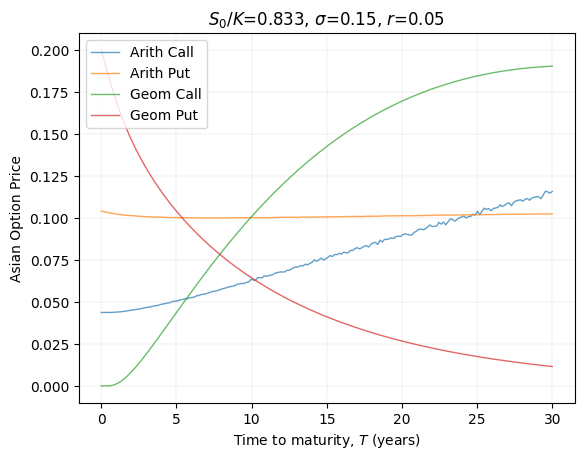

In [22]:
x_axis = [Ts, r"Time to maturity, $T$ (years)"]
data1 = [arith_call_prices_T, "Arith Call"]
data2 = [arith_put_prices_T, "Arith Put"]
data3 = [geom_call_prices_T, "Geom Call"]
data4 = [geom_put_prices_T, "Geom Put"]
y_label = "Asian Option Price"
title = rf"$S_0/K$={S0/K:.3f}, $\sigma$={sigma:.2f}, $r$={r:.2f}"

save_path = plot_dir + "Asian_opt_price_time_to_maturity.png"
# save_path = None

plot_scaling_analysis(
    x_axis, data1, data2, data3, data4, y_label, title, save_path, False
)